<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/OptimizingHousePricePredictionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Drop ID

In [ ]:
train_ID = df['Id']
df.drop("Id", axis = 1, inplace = True)

NaN

In [ ]:
nancatcolumn = df[df.select_dtypes(include='object').columns].isna().sum()
nancatcolumn = nancatcolumn[nancatcolumn > 0].index.tolist()
df[nancatcolumn] = df[nancatcolumn].fillna('None')

In [ ]:
nannumcolumn = df[df.select_dtypes(include=['float64', 'int64']).columns].isna().sum()
nannumcolumn = nannumcolumn[nannumcolumn > 0].index.tolist()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[nannumcolumn] = imputer.fit_transform(df[nannumcolumn])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Fix and Add Features

In [ ]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [ ]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [ ]:
df['Age'] = df['YrSold'].astype(int) - df['YearBuilt']

In [ ]:
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd']

In [ ]:
df['TotalLivingArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

In [ ]:
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']

In [ ]:
df['TotalBsmtBaths'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

In [ ]:
df['TotalBaths'] = df['FullBath'] + 0.5 * df['HalfBath']

In [ ]:
df['GarageScore'] = df['GarageCars'] * df['GarageArea']

Checking Correlation

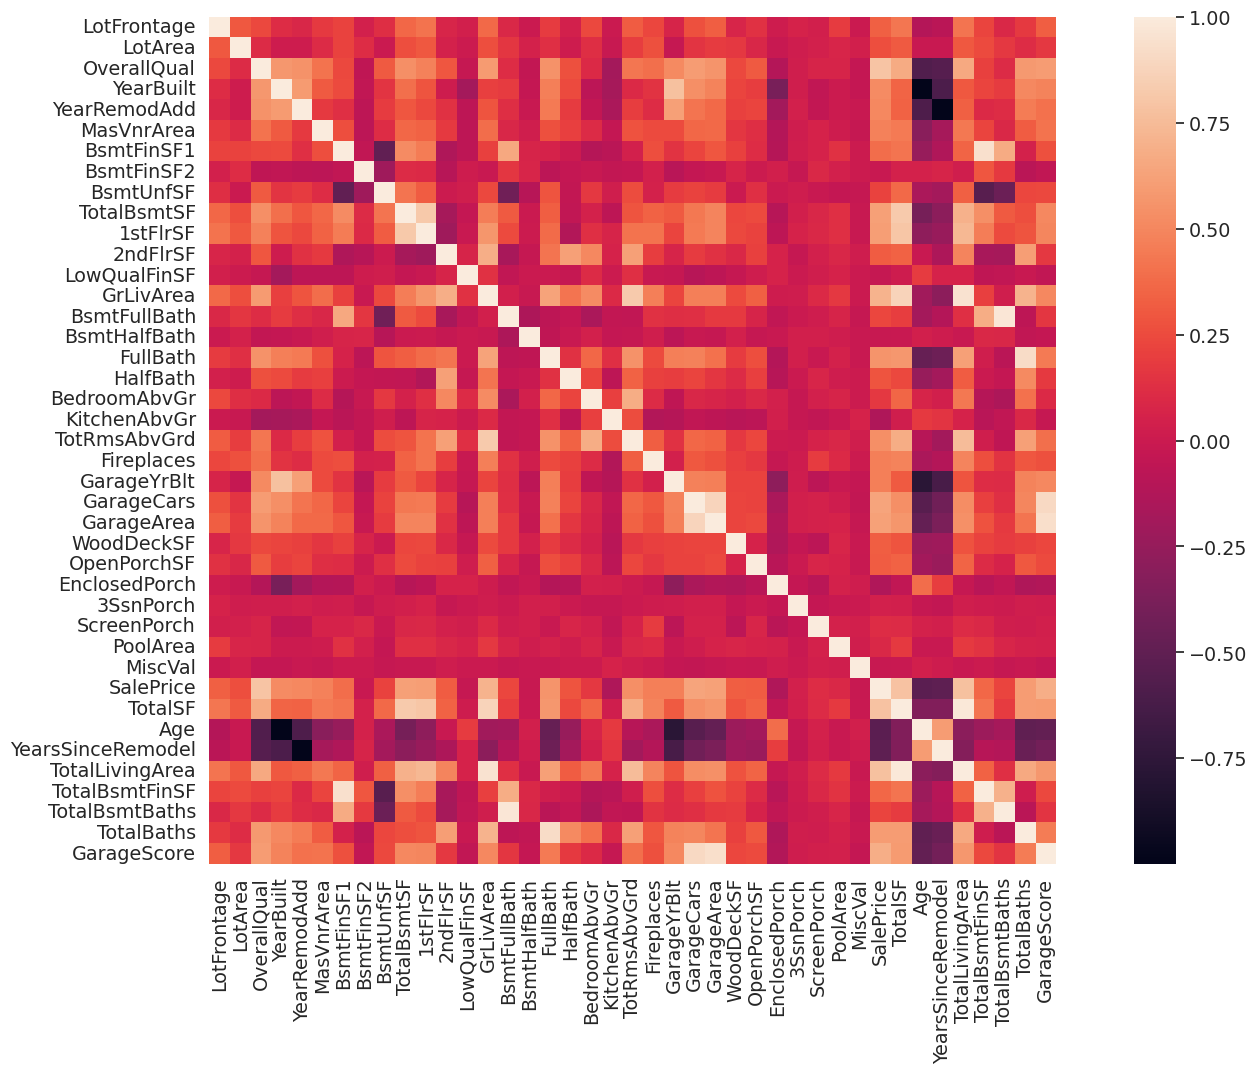

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(corrmat, vmax=1, square=True);

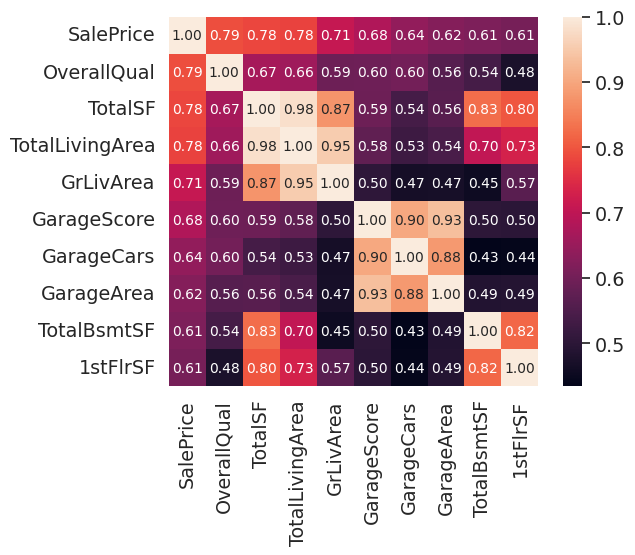

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,TotalSF
3,TotalLivingArea
4,GrLivArea
5,GarageScore
6,GarageCars
7,GarageArea
8,TotalBsmtSF
9,1stFlrSF


Encoding Object Type Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dfcatcolumns = df.select_dtypes(include='object').columns.tolist()
encode = LabelEncoder()
for col in dfcatcolumns:
  df[col] = encode.fit_transform(df[col])

Train df and dfor

In [ ]:
features = most_corr['Most Correlated Features'].tolist()
features.remove('SalePrice')
X = df[features]
y = df['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Linear Regression

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_predlr = model.predict(X_test_scaled)

In [ ]:
mse_lr = mean_squared_error(y_test, y_predlr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_predlr)
mae_lr = mean_absolute_error(y_test, y_predlr)

print('Mean Squared Error (MSE):', mse_lr)
print('Root Mean Squared Error (RMSE):', rmse_lr)
print('R-squared (R2):', r2_lr)
print('Mean Absolute Error (MAE):', mae_lr)

Mean Squared Error (MSE): 1968913995.259549
Root Mean Squared Error (RMSE): 44372.44635198232
R-squared (R2): 0.7099843161710861
Mean Absolute Error (MAE): 25260.81802266962


In [ ]:
print(y_predlr)

[267126.08770583 156309.69958947 115328.59702973 227231.69122878
 121100.77133428 116019.07533881 268422.68447827 148236.00209894
 495433.56988528 158460.38519702 201832.6396995  189197.36884061
 217641.14053467 104376.31452238 142814.08203005 141647.96588296
 211823.59615586  93144.19379583 133856.94052931 191830.86571836
 153409.38398171 133646.50798912 113327.91527046 153711.35321457
 189958.76968119 222560.82518076 164916.1640421   61768.93147304
 311394.85863947 118142.50832989 233769.17622723 197482.18326222
 140852.4802074  295946.84341432 325052.18467562 178230.92806024
 268474.4474657  116472.93671711 225838.29976632 299812.3705967
 225657.88504868 133221.21294569 195043.66045347 309044.32697924
 334759.70164554 178475.50800322 123782.30475136 105223.55983316
 176479.62786303  57530.16677949 348239.43973415 135678.96442905
 186452.16682927  75539.18549249 228268.62062192 115956.18056494
 117228.70607608 264327.28814393 138203.262752    95326.45120663
 150796.31876484 118362.23

In [ ]:
import pickle
filename = 'linear_regression_model.pkl'
pickle.dump(y_predlr, open(filename, 'wb'))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_preddt = dt_regressor.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_preddt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_preddt)
mae_dt = mean_absolute_error(y_test, y_preddt)

print('Mean Squared Error (MSE):', mse_dt)
print('Root Mean Squared Error (RMSE):', rmse_dt)
print('R-squared (R2):', r2_dt)
print('Mean Absolute Error (MAE):', mae_dt)

Mean Squared Error (MSE): 1806871221.3259299
Root Mean Squared Error (RMSE): 42507.3078578958
R-squared (R2): 0.7338527766549061
Mean Absolute Error (MAE): 29617.408784518375


In [ ]:
print(y_preddt)

[256000.         140200.         144000.         222500.
  85000.         137000.         174000.         103600.
 755000.          55993.         180000.         135000.
 190000.         130000.         142125.         145250.
 193000.         108000.         164900.         122000.
 153900.         140714.28571429 138000.         135000.
 215000.         227000.         167900.          75500.
 337500.         133500.         190000.         274725.
 134900.         287000.         305900.         189000.
 264132.         131000.         236000.         276000.
 190000.         159500.         176485.         372402.
 285000.         125000.         105500.         100000.
 192000.          84000.         446261.         145000.
 158000.          55000.         220000.         120500.
 167500.         235000.         155000.         109500.
 143500.         138500.         157900.         154000.
 167000.         187000.         119500.         216000.
 110000.         185000.       

In [ ]:
filename = 'decision_tree_model.pkl'
pickle.dump(y_preddt, open(filename, 'wb'))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_predrf = rf_regressor.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_predrf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_predrf)
mae_rf = mean_absolute_error(y_test, y_predrf)

print('Mean Squared Error (MSE):', mse_rf)
print('Root Mean Squared Error (RMSE):', rmse_rf)
print('R-squared (R2):', r2_rf)
print('Mean Absolute Error (MAE):', mae_rf)

Mean Squared Error (MSE): 1037181984.121033
Root Mean Squared Error (RMSE): 32205.309874631435
R-squared (R2): 0.8472259107791863
Mean Absolute Error (MAE): 21035.32643142866


In [ ]:
print(y_predrf)

[224740.8        140801.34       117833.77       237895.5
  91953.90619048 122284.5        238941.39       136851.86
 651759.18       123814.67609524 193780.43       155882.
 222518.7        126414.         139417.54       157205.
 212051.11       103295.52       143512.         175051.
 147514.5        140685.44113566 129593.01515152 154223.
 207060.5        203886.95       173197.33333333  69946.44333333
 329555.35       117506.95       167985.5        182156.7
 137546.92802988 293392.26       355512.04       179278.1
 264632.93       133104.         235473.52       298809.3
 209812.9        136200.26666667 180342.69       306166.62
 351371.76       152018.         128067.         126302.
 185593.5         93246.11       422165.99       140718.24
 169001.82        66456.         231080.77       114063.
 123923.32       232095.6        152891.5        109512.93
 149627.5        132295.         144821.99       151414.74
 192515.         181301.         114837.5        200370.78
 122659

In [ ]:
filename = 'random_forest_model.pkl'
pickle.dump(y_predrf, open(filename, 'wb'))

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_predgb = gb_regressor.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, y_predgb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_predgb)
mae_gb = mean_absolute_error(y_test, y_predgb)

print('Mean Squared Error (MSE):', mse_gb)
print('Root Mean Squared Error (RMSE):', rmse_gb)
print('R-squared (R2):', r2_gb)
print('Mean Absolute Error (MAE):', mae_gb)

Mean Squared Error (MSE): 972592377.5116358
Root Mean Squared Error (RMSE): 31186.41334798915
R-squared (R2): 0.8567397844040195
Mean Absolute Error (MAE): 20900.2155865613


In [ ]:
print(y_predgb)

[199760.99379996 147821.69575334 120496.98115576 234022.36760465
 101649.78652444 120695.3572335  234232.87837566 142975.06785096
 714831.514061   138186.0002519  188106.3532534  166810.68286413
 216313.88074121 119735.5579146  134251.30552865 147508.58615938
 213059.25565418  95772.98239776 138901.98473757 172217.98354163
 154752.56805749 142911.76171767 120138.0864818  144121.65541239
 190256.75160793 208504.32637071 168758.07000807  72220.84984927
 310157.39771978 129859.37369223 161083.57620558 191733.36589315
 142012.2736146  296495.74153541 357633.0595359  175559.49670491
 272406.31927656 129045.57724242 236205.37041217 306635.06159184
 201121.83664164 128533.00009797 205893.94901184 315410.64042344
 377815.21545158 161778.16402658 124431.51399272 122434.15188091
 175713.32577369  92500.15960817 422154.52110939 140867.62931801
 184780.82254188  82134.07563902 228828.28751531 118401.86554348
 119746.47454628 235620.0170113  140867.62931801 107056.45047476
 143356.3509592  130543.9

In [ ]:
filename = 'gradient_boost_model.pkl'
pickle.dump(y_predgb, open(filename, 'wb'))

SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

svr_regressor = make_pipeline(StandardScaler(), SVR())
svr_regressor.fit(X_train, y_train)
y_predsv = svr_regressor.predict(X_test)

In [ ]:
mse_sv = mean_squared_error(y_test, y_predsv)
rmse_sv = np.sqrt(mse_sv)
r2_sv = r2_score(y_test, y_predsv)
mae_sv = mean_absolute_error(y_test, y_predsv)

print('Mean Squared Error (MSE):', mse_sv)
print('Root Mean Squared Error (RMSE):', rmse_sv)
print('R-squared (R2):', r2_sv)
print('Mean Absolute Error (MAE):', mae_sv)

Mean Squared Error (MSE): 7129915599.77894
Root Mean Squared Error (RMSE): 84438.82756042352
R-squared (R2): -0.05021720262582985
Mean Absolute Error (MAE): 56382.27617202679


In [ ]:
print(y_predsv)

[162984.36382223 162839.04534996 162757.23996345 163093.54478837
 162786.03025711 162757.30805225 163075.0928491  162842.19116417
 162953.893152   162871.01803392 163025.70840607 163039.17482023
 163065.7856376  162740.58473766 162795.5575384  162858.49054426
 163046.31825669 162808.77471627 162822.34055018 162917.17168216
 162925.64322359 162814.04755669 162808.26718447 162873.68949015
 163019.21666956 163028.67193801 162915.91863325 162835.29939094
 163069.83568394 162760.51918685 163020.38316132 162995.41550655
 162829.89712779 163068.37582131 163031.36560298 162916.30780297
 163086.75914976 162801.29036492 163074.88726517 163063.90603306
 163045.48313691 162876.08972774 162996.15856973 163054.95921799
 163033.25577472 162980.08501969 162858.26584585 162741.83031241
 162966.05907542 162832.19151454 163038.2294199  162855.750108
 163014.52369357 162812.39423698 163096.56006434 162926.45474765
 162834.10748915 163041.64694639 162865.152627   162746.32818402
 162858.24361235 162763.465

In [ ]:
filename = 'svm_model.pkl'
pickle.dump(y_predsv, open(filename, 'wb'))

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predl = lasso.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.318e+11, tolerance: 6.234e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
mse_l = mean_squared_error(y_test, y_predl)
rmse_l = np.sqrt(mse_l)
r2_l = r2_score(y_test, y_predl)
mae_l = mean_absolute_error(y_test, y_predl)

print('Mean Squared Error (MSE):', mse_l)
print('Root Mean Squared Error (RMSE):', rmse_l)
print('R-squared (R2):', r2_l)
print('Mean Absolute Error (MAE):', mae_l)

Mean Squared Error (MSE): 1968883090.6532736
Root Mean Squared Error (RMSE): 44372.09810965979
R-squared (R2): 0.709988868335652
Mean Absolute Error (MAE): 25261.392801243113


In [ ]:
print(y_predl)

[267130.23229055 156305.5773329  115324.47430678 227230.83007455
 121096.22972123 116017.88825282 268424.07312964 148225.20983431
 495423.73417802 158460.79040952 201835.85597016 189201.98482291
 217640.22382482 104374.76884125 142812.29779904 141646.70085783
 211820.11597673  93135.11920036 133856.12820201 191826.29353107
 153405.74964759 133652.33885058 113332.20304626 153717.12258814
 189957.86549487 222560.91766464 164918.77806003  61759.56002326
 311394.26088958 118138.70334793 233769.51419081 197483.4907066
 140856.71224813 295941.28706121 325050.7069965  178233.33670992
 268471.83974378 116479.0400338  225832.73048772 299802.73034675
 225657.78623661 133222.09929093 195048.95543225 309041.52043914
 334754.6684699  178473.26394507 123780.06780323 105221.62975703
 176482.51263008  57527.86371118 348237.08562005 135683.49614616
 186451.70789607  75529.94432876 228268.51404258 115985.8962308
 117234.83590795 264323.47230671 138208.95476088  95325.75496345
 150800.14959447 118360.935

In [ ]:
filename = 'lasso_model.pkl'
pickle.dump(y_predl, open(filename, 'wb'))

Elastic Net

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_prede = elastic_net.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.034e+11, tolerance: 6.234e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
mse_e = mean_squared_error(y_test, y_prede)
rmse_e = np.sqrt(mse_e)
r2_e = r2_score(y_test, y_prede)
mae_e = mean_absolute_error(y_test, y_prede)

print('Mean Squared Error (MSE):', mse_e)
print('Root Mean Squared Error (RMSE):', rmse_e)
print('R-squared (R2):', r2_e)
print('Mean Absolute Error (MAE):', mae_e)

Mean Squared Error (MSE): 2096149029.5089307
Root Mean Squared Error (RMSE): 45783.72013618957
R-squared (R2): 0.6912429412031229
Mean Absolute Error (MAE): 25106.565973318993


In [ ]:
print(y_prede)

[278605.27947264 152351.71017271 115053.15921886 226118.53983658
 113023.02529221 117410.51150383 261422.90595674 142715.86383176
 499530.16726489 147628.9364384  196256.8575667  203507.97457445
 215327.34849171 103921.57636007 136974.21473328 146498.3440818
 206207.22653321  97377.99082781 137736.86163172 183291.90241122
 161824.13647967 130196.19192837 117325.50956435 154859.33989147
 194330.97384164 210352.52281894 166708.87975181  61694.14064689
 298902.11651413 120157.49864671 252221.82757037 191247.80172848
 137809.41520439 293086.69291314 324641.28676602 171014.51826639
 249089.66170694 121386.93612461 224013.54122705 295899.33157246
 227818.96801764 133689.38182115 189117.00654478 306062.89176336
 337784.94561854 188132.44194144 127418.42360926 105011.4507464
 179878.81174793  56356.35952406 343003.2532909  142754.71167328
 188497.93622515  77355.38600407 224671.1436445  139948.06853067
 121150.38205369 257327.6237356  145933.98668435  94005.99095871
 148475.17285862 120049.506

In [ ]:
filename = 'elastic_net_model.pkl'
pickle.dump(y_prede, open(filename, 'wb'))

Kernel Ridge

In [ ]:
kernel_ridge = KernelRidge()
kernel_ridge.fit(X_train, y_train)
y_predkr = kernel_ridge.predict(X_test)

In [ ]:
mse_kr = mean_squared_error(y_test, y_predkr)
rmse_kr = np.sqrt(mse_kr)
r2_kr = r2_score(y_test, y_predkr)
mae_kr = mean_absolute_error(y_test, y_predkr)

print('Kernel Ridge - Mean Squared Error (MSE):', mse_kr)
print('Kernel Ridge - Root Mean Squared Error (RMSE):', rmse_kr)
print('Kernel Ridge - R-squared (R2):', r2_kr)
print('Kernel Ridge - Mean Absolute Error (MAE):', mae_kr)

Kernel Ridge - Mean Squared Error (MSE): 2059877100.082046
Kernel Ridge - Root Mean Squared Error (RMSE): 45385.868947085786
Kernel Ridge - R-squared (R2): 0.6965856978912561
Kernel Ridge - Mean Absolute Error (MAE): 25671.70598306177


In [ ]:
print(y_predkr)

[248764.93701172 157958.32495117 120940.54614258 219257.68334961
 128230.99121094 125418.12329102 268505.48486328 142813.22875977
 467102.89648438 158178.85656738 192349.84838867 192313.71142578
 211158.078125   114783.66113281 144593.28564453 146999.95507812
 203267.03100586 129566.17236328 141034.34179688 188859.54980469
 165905.35107422 138444.17199707 126997.41625977 159178.04858398
 192556.28222656 209109.52954102 169709.28076172 102601.22167969
 300800.23217773 127538.08886719 258624.22192383 189615.26147461
 144852.46142578 301754.69677734 320983.79150391 175378.55712891
 240213.90893555 129189.10791016 220746.92480469 279392.42773438
 209031.5534668  134466.69946289 185901.63452148 308635.60131836
 334866.76708984 176809.33081055 137878.64367676 115251.13647461
 179572.00732422  69715.18811035 336267.88916016 146197.35717773
 185945.64819336 114435.85717773 214717.2331543  153714.23449707
 127243.70324707 271858.38256836 148041.55249023 108586.71484375
 152514.05810547 127241.4

In [ ]:
filename = 'kernel_ridge_model.pkl'
pickle.dump(y_predkr, open(filename, 'wb'))

XGBoost

In [ ]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_predxg = xgb_regressor.predict(X_test)

In [ ]:
mse_xg = mean_squared_error(y_test, y_predxg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_predxg)
mae_xg = mean_absolute_error(y_test, y_predxg)

print('XGBoost - Mean Squared Error (MSE):', mse_xg)
print('XGBoost - Root Mean Squared Error (RMSE):', rmse_xg)
print('XGBoost - R-squared (R2):', r2_xg)
print('XGBoost - Mean Absolute Error (MAE):', mae_xg)


XGBoost - Mean Squared Error (MSE): 1162685836.0704439
XGBoost - Root Mean Squared Error (RMSE): 34098.179365919874
XGBoost - R-squared (R2): 0.8287395342620276
XGBoost - Mean Absolute Error (MAE): 22779.607751855023


In [ ]:
print(y_predxg)

[253218.62  146303.58  100218.71  226608.75   95144.13  131627.56
 236106.33  146157.75  709240.7   114223.37  198496.33  151191.6
 198241.08  123736.516 139598.47  172138.39  213360.12   97339.23
 142930.7   164072.17  154342.61  141472.02  126978.16  152841.1
 210360.12  181317.    182324.4    75098.83  346405.78  122607.016
 188830.7   179100.03  145510.48  311633.94  366383.72  184382.02
 285509.84  124650.59  230673.88  293125.44  224333.08  131189.94
 196121.23  290229.5   355436.56  141723.45  134231.83  125861.44
 176207.45   94419.375 479115.56  131369.61  175889.56   61375.
 222046.83  110010.586 126828.52  234381.03  152682.1    94623.73
 144672.39  138505.3   129262.78  150125.25  185396.38  188548.05
 114536.875 211666.95  125801.69  192930.33  173807.58  105704.32
  74758.34  219692.31   93741.54  295656.34  140583.69  115051.25
 255539.03  152808.22  127469.49  129113.49  136562.6   151268.97
 204380.9   195853.8   111150.38  198782.88  158641.02  140778.7
 189264.28  19

In [ ]:
filename = 'XGBoost_model.pkl'
pickle.dump(y_predxg, open(filename, 'wb'))

LightGBM

In [ ]:
lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)
y_predlgbm = lgbm_regressor.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 9
[LightGBM] [Info] Start training from score 180586.228963


In [ ]:
mse_lgbm = mean_squared_error(y_test, y_predlgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_predlgbm)
mae_lgbm = mean_absolute_error(y_test, y_predlgbm)

print('LightGBM - Mean Squared Error (MSE):', mse_lgbm)
print('LightGBM - Root Mean Squared Error (RMSE):', rmse_lgbm)
print('LightGBM - R-squared (R2):', r2_lgbm)
print('LightGBM - Mean Absolute Error (MAE):', mae_lgbm)

LightGBM - Mean Squared Error (MSE): 1314769786.8370874
LightGBM - Root Mean Squared Error (RMSE): 36259.754368129514
LightGBM - R-squared (R2): 0.8063379813820215
LightGBM - Mean Absolute Error (MAE): 22890.27435436724


In [ ]:
print(y_predlgbm)

[215525.39107159 153209.36994829 111810.55321188 235472.96824301
 101524.25978752 125530.40098141 245601.71051703 146774.57834907
 514779.87833716 123362.57191868 190002.57226013 156651.66521628
 226661.68681704 125551.24223562 137657.8334409  157912.38848711
 205844.01815583  90236.25828296 141848.74203268 174097.04255334
 151272.78352176 142227.86854281 115610.10516405 142045.47208475
 212083.35128013 210935.40360515 182377.99092429  61362.63263359
 348379.90351803 122136.91116712 130369.40898047 168618.76638
 138622.31778034 324680.96042412 400847.02057933 181075.2994386
 308621.84979339 127199.54585446 238975.57713923 279040.77081362
 203771.91288806 139368.85129327 183670.69726088 296712.16647534
 424633.31390708 153582.81496959 126110.44058052 128495.89462633
 180281.61270457  87659.67585808 435745.89133035 145881.82177146
 179117.09542596  64543.61330772 224806.52845923 101014.47575784
 121477.03045108 231807.31686603 158548.16401894 108884.32146199
 144028.97743708 134733.35013

In [ ]:
filename = 'LGBM_model.pkl'
pickle.dump(y_predlgbm, open(filename, 'wb'))

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.svm import NuSVR, LinearSVR
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print('Ridge - Mean Squared Error (MSE):', mse_ridge)
print('Ridge - Root Mean Squared Error (RMSE):', rmse_ridge)
print('Ridge - R-squared (R2):', r2_ridge)
print('Ridge - Mean Absolute Error (MAE):', mae_ridge)

Ridge - Mean Squared Error (MSE): 1968767709.2244647
Ridge - Root Mean Squared Error (RMSE): 44370.79793315041
Ridge - R-squared (R2): 0.7100058637067336
Ridge - Mean Absolute Error (MAE): 25258.492459569177


In [ ]:
print(y_pred_ridge)

[267180.22589087 156291.00015627 115312.09625071 227234.50195408
 121065.401305   116018.02785844 268407.13928805 148175.97015816
 495433.21080786 158435.15063187 201830.15165631 189255.80109982
 217641.58940607 104367.96540744 142791.89345224 141657.11945512
 211801.80639612  93124.66787616 133865.50062101 191803.11154348
 153415.99859269 133659.43971932 113352.80323856 153748.19923878
 189975.80130332 222537.05777773 164940.26027251  61734.62442612
 311356.75028691 118135.1446702  233819.06518822 197479.99244956
 140859.14915906 295925.23510497 325044.27315802 178228.63999867
 268408.63572072 116509.38229066 225820.3633016  299771.60343827
 225665.76379678 133224.97781189 195050.06522399 309022.36070547
 334761.96039217 178494.25209508 123774.74520487 105213.68067286
 176509.42347966  57517.65242268 348228.95894935 135714.56534751
 186451.83559245  75511.36571808 228257.10483231 116148.83600274
 117273.86398173 264298.92226272 138246.46486241  95319.66866084
 150803.89139995 118361.4

In [ ]:
filename = 'ridge_model.pkl'
pickle.dump(y_pred_ridge, open(filename, 'wb'))

Bayesian Ridge

In [ ]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian_ridge = bayesian_ridge.predict(X_test)

In [ ]:
mse_br = mean_squared_error(y_test, y_pred_bayesian_ridge)
rmse_br = np.sqrt(mse_br)
r2_br = r2_score(y_test, y_pred_bayesian_ridge)
mae_br = mean_absolute_error(y_test, y_pred_bayesian_ridge)

print('Bayesian Ridge - Mean Squared Error (MSE):', mse_br)
print('Bayesian Ridge - Root Mean Squared Error (RMSE):', rmse_br)
print('Bayesian Ridge - R-squared (R2):', r2_br)
print('Bayesian Ridge - Mean Absolute Error (MAE):', mae_br)

Bayesian Ridge - Mean Squared Error (MSE): 2688132064.2312937
Bayesian Ridge - Root Mean Squared Error (RMSE): 51847.19919370085
Bayesian Ridge - R-squared (R2): 0.6040454480452313
Bayesian Ridge - Mean Absolute Error (MAE): 28659.970205921774


In [ ]:
print(y_pred_bayesian_ridge)

[296993.81449256 145818.30177355 117583.04898097 223015.69646446
  99682.29937669 120812.95025789 246720.94237894 141046.76565
 507525.6532751  126495.67765319 183858.96028491 227581.53248193
 209738.18634077 104277.66263743 126791.40062111 156389.05802823
 196958.61519016 108210.82580561 145321.68714837 166964.09978334
 180945.75430007 120035.95189816 122783.17537617 150984.24265496
 201724.89405835 185571.32774055 166688.42098875  64888.86950955
 275149.59817382 126225.25224868 286052.85403546 176981.05931608
 129775.37165827 288573.57033953 324041.51172662 154292.19348458
 215216.69150211 126941.24988576 222818.11737031 293951.44082106
 232546.30962334 135064.75418424 174263.59107675 301749.0845378
 343028.085991   208020.51380335 137902.47820206 106283.96334636
 182684.35391406  56261.28974077 331233.9393873  153641.4334546
 193904.69092896  83902.39477282 218721.58423635 162294.76634013
 122691.58556395 244343.91239929 157009.51347472  91837.18672537
 142058.32625357 124129.124354

In [ ]:
filename = 'beysian_ridge_model.pkl'
pickle.dump(y_pred_bayesian_ridge, open(filename, 'wb'))

NuSVR

In [ ]:
nusvr = NuSVR()
nusvr.fit(X_train, y_train)
y_pred_nusvr = nusvr.predict(X_test)

In [ ]:
mse_nusvr = mean_squared_error(y_test, y_pred_nusvr)
rmse_nusvr = np.sqrt(mse_nusvr)
r2_nusvr = r2_score(y_test, y_pred_nusvr)
mae_nusvr = mean_absolute_error(y_test, y_pred_nusvr)

print('NuSVR - Mean Squared Error (MSE):', mse_nusvr)
print('NuSVR - Root Mean Squared Error (RMSE):', rmse_nusvr)
print('NuSVR - R-squared (R2):', r2_nusvr)
print('NuSVR - Mean Absolute Error (MAE):', mae_nusvr)

NuSVR - Mean Squared Error (MSE): 6861632698.988223
NuSVR - Root Mean Squared Error (RMSE): 82834.97268055458
NuSVR - R-squared (R2): -0.010699860009669493
NuSVR - Mean Absolute Error (MAE): 56809.33699241752


In [ ]:
print(y_pred_nusvr)

[172740.7599204  172574.19901157 172521.44713371 172691.75051944
 172498.16951762 172522.54979621 172676.35642975 172550.45586586
 172642.84632568 172512.60965919 172613.90415616 172695.50958837
 172669.09321389 172501.4781159  172533.28406131 172587.88448499
 172644.8114117  172512.933238   172566.30174479 172617.10788312
 172587.61575416 172506.0672315  172506.97079158 172559.19821923
 172649.25199869 172623.69140309 172582.75454267 172482.18853071
 172721.9591434  172529.87367143 172726.1641321  172613.08120325
 172515.85490507 172733.68668615 172756.1834031  172560.15584569
 172671.26884719 172512.43822798 172683.73509019 172754.36197844
 172718.95254833 172539.3821422  172599.30165044 172742.40048112
 172756.8669317  172685.49415979 172519.67129681 172502.84261893
 172615.91644764 172486.38301042 172759.37796641 172549.20513292
 172620.48965499 172488.72970746 172680.43894651 172536.93322915
 172523.50334776 172668.2908693  172557.73740862 172490.67529767
 172534.43679837 172527.5

In [ ]:
filename = 'NuSVR_model.pkl'
pickle.dump(y_pred_nusvr, open(filename, 'wb'))

Linear SVR

In [ ]:
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)
y_pred_linear_svr = linear_svr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
mse_lsvr = mean_squared_error(y_test, y_pred_linear_svr)
rmse_lsvr = np.sqrt(mse_lsvr)
r2_lsvr = r2_score(y_test, y_pred_linear_svr)
mae_lsvr = mean_absolute_error(y_test, y_pred_linear_svr)

print('LinearSVR - Mean Squared Error (MSE):', mse_lsvr)
print('LinearSVR - Root Mean Squared Error (RMSE):', rmse_lsvr)
print('LinearSVR - R-squared (R2):', r2_lsvr)
print('LinearSVR - Mean Absolute Error (MAE):', mae_lsvr)

LinearSVR - Mean Squared Error (MSE): 2583451578.629578
LinearSVR - Root Mean Squared Error (RMSE): 50827.66548474933
LinearSVR - R-squared (R2): 0.6194645992567205
LinearSVR - Mean Absolute Error (MAE): 28610.50868280209


In [ ]:
print(y_pred_linear_svr)

[276853.65463336 142262.91146823 115797.79587349 214867.65025043
 101504.92875711 118223.81074492 240044.31533687 138219.2115217
 477648.9139626  128560.2661826  177572.71506282 215906.86465553
 203332.46311087 103591.34709951 123834.38357951 149650.26066954
 191957.46118452 106630.77669029 139867.06383997 162203.67300305
 177323.11641111 120556.30167327 123268.46311406 149589.76000512
 196098.27362591 181492.24854906 164156.58481298  68368.13275799
 265658.42329199 124111.31757252 275276.20581668 173175.63179894
 129465.97101537 281019.41448303 309338.89776173 153094.45805876
 206549.0533193  126579.69069182 216306.71624841 279912.85562066
 220125.29798911 133639.68933434 168664.4313656  290007.56203842
 329468.68816059 195272.96325294 137961.98297972 105401.70370585
 178185.2877884   60071.99718923 317759.01494854 150516.40146818
 187191.50540205  85161.18203939 208931.52135749 163563.86078432
 123606.80215906 241055.15647857 153261.25702259  92621.10383101
 140298.8794009  121154.87

In [ ]:
filename = 'linear_svr_model.pkl'
pickle.dump(y_pred_linear_svr, open(filename, 'wb'))

Extra Tree

In [ ]:
extra_trees = ExtraTreesRegressor()
extra_trees.fit(X_train, y_train)
y_pred_extra_trees = extra_trees.predict(X_test)

In [ ]:
mse_et = mean_squared_error(y_test, y_pred_extra_trees)
rmse_et = np.sqrt(mse_et)
r2_et = r2_score(y_test, y_pred_extra_trees)
mae_et = mean_absolute_error(y_test, y_pred_extra_trees)

print('Extra Trees - Mean Squared Error (MSE):', mse_et)
print('Extra Trees - Root Mean Squared Error (RMSE):', rmse_et)
print('Extra Trees - R-squared (R2):', r2_et)
print('Extra Trees - Mean Absolute Error (MAE):', mae_et)

Extra Trees - Mean Squared Error (MSE): 988526973.2864062
Extra Trees - Root Mean Squared Error (RMSE): 31440.848800348984
Extra Trees - R-squared (R2): 0.8543926617255868
Extra Trees - Mean Absolute Error (MAE): 21470.609940204395


In [ ]:
print(y_pred_extra_trees)

[246876.         144782.         117781.34       227827.2
  95434.16666667 125787.         241814.93       137017.83
 695080.         134181.40285714 206657.61       156261.5
 225157.55       129010.         146357.54       150989.
 204521.56       110911.5        145206.         173467.98
 147820.24       140714.28571429 126958.72       160609.5
 189666.78       201936.         171673.49        75500.
 332669.81       116435.83       156325.98       185097.15
 139315.57142857 303907.47       360441.94       183307.1
 264795.26       133985.         228912.         305835.
 200789.4        136749.44       178854.78       279841.05
 353301.72       160689.         131590.         120556.
 180439.          86788.11       438732.53       146929.5
 173335.          54536.         229666.15       108732.5
 139157.38285714 236395.12       154603.         116907.
 149812.5        131945.         139273.85       150736.5
 181874.         188306.82       114415.         207758.78
 122497.      

In [ ]:
filename = 'extra_tree_model.pkl'
pickle.dump(y_pred_extra_trees, open(filename, 'wb'))

AdaBoost

In [ ]:
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

In [ ]:
mse_ab = mean_squared_error(y_test, y_pred_adaboost)
rmse_ab = np.sqrt(mse_ab)
r2_ab = r2_score(y_test, y_pred_adaboost)
mae_ab = mean_absolute_error(y_test, y_pred_adaboost)

print('AdaBoost - Mean Squared Error (MSE):', mse_ab)
print('AdaBoost - Root Mean Squared Error (RMSE):', rmse_ab)
print('AdaBoost - R-squared (R2):', r2_ab)
print('AdaBoost - Mean Absolute Error (MAE):', mae_ab)

AdaBoost - Mean Squared Error (MSE): 1199171853.0129013
AdaBoost - Root Mean Squared Error (RMSE): 34629.06081621189
AdaBoost - R-squared (R2): 0.8233652430643235
AdaBoost - Mean Absolute Error (MAE): 24162.506340703734


In [ ]:
print(y_pred_adaboost)

[268651.0729927  149163.03040541 112319.19730942 227595.59583333
 118879.90625    118194.73076923 227595.59583333 139688.63
 673628.37837838 193355.38043478 202101.46938776 204655.71428571
 220085.08429119 112319.19730942 135661.69753086 144901.04854369
 202101.46938776 112319.19730942 121445.04494382 194473.23837209
 146708.49122807 130642.32333333 119744.61111111 146708.49122807
 183808.34901961 208034.62325581 173258.34230769 109378.4591195
 316295.28       118194.73076923 204655.71428571 194473.23837209
 135661.69753086 268651.0729927  316743.5        188597.12403101
 312397.70588235 120301.41958042 225703.35078534 311930.86341463
 204655.71428571 120301.41958042 198784.50241546 274949.36111111
 316743.5        190555.17241379 119744.61111111 112319.19730942
 175852.5258216  109378.4591195  459941.42857143 130642.32333333
 175852.5258216  109378.4591195  230219.24736842 120301.41958042
 118194.73076923 208034.62325581 130642.32333333 109378.4591195
 135661.69753086 120301.41958042 

In [ ]:
filename = 'adaboost_model.pkl'
pickle.dump(y_pred_adaboost, open(filename, 'wb'))

MLP

In [ ]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print('MLP - Mean Squared Error (MSE):', mse_mlp)
print('MLP - Root Mean Squared Error (RMSE):', rmse_mlp)
print('MLP - R-squared (R2):', r2_mlp)
print('MLP - Mean Absolute Error (MAE):', mae_mlp)

MLP - Mean Squared Error (MSE): 2735272307.515042
MLP - Root Mean Squared Error (RMSE): 52299.83085551082
MLP - R-squared (R2): 0.5971018182448877
MLP - Mean Absolute Error (MAE): 29230.92024584914


In [ ]:
filename = 'mlp_model.pkl'
pickle.dump(y_pred_mlp, open(filename, 'wb'))

Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
voting_regressor = VotingRegressor(estimators=[('lr', model), ('dt', dt_regressor)])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)

In [ ]:
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)

print('Voting Regressor - Mean Squared Error (MSE):', mse_voting)
print('Voting Regressor - Root Mean Squared Error (RMSE):', rmse_voting)
print('Voting Regressor - R-squared (R2):', r2_voting)
print('Voting Regressor - Mean Absolute Error (MAE):', mae_voting)

Voting Regressor - Mean Squared Error (MSE): 1354221975.8184566
Voting Regressor - Root Mean Squared Error (RMSE): 36799.75510541417
Voting Regressor - R-squared (R2): 0.8005267810992631
Voting Regressor - Mean Absolute Error (MAE): 24037.314109400202


In [ ]:
print(y_pred_voting)

[261563.04385292 148254.84979474 129664.29851486 224865.84561439
 103050.38566714 126509.5376694  221211.34223913 125918.00104947
 625216.78494264 107226.69259851 190916.31984975 162098.68442031
 203820.57026733 117188.15726119 142469.54101503 143448.98294148
 202411.79807793 100572.09689792 149378.47026466 156915.43285918
 153654.69199085 137180.3968517  125663.95763523 144355.67660729
 202479.38484059 224780.41259038 166408.08202105  68634.46573652
 324447.42931974 125821.25416495 211884.58811361 236103.59163111
 137876.2401037  291473.42170716 315476.09233781 183615.46403012
 266303.22373285 123736.46835856 230919.14988316 287906.18529835
 207828.94252434 146360.60647284 185764.33022674 340723.16348962
 309879.85082277 151737.75400161 114641.15237568 102611.77991658
 184239.81393152  70765.08338974 397250.21986708 140339.48221453
 172226.08341464  65269.59274624 224134.31031096 118228.09028247
 142364.35303804 249663.64407196 146601.631376   102413.22560331
 147148.15938242 128431.1

In [ ]:
filename = 'voting_model.pkl'
pickle.dump(y_pred_voting, open(filename, 'wb'))

Stacking Regressor

In [ ]:
estimators = [('lr', model), ('dt', dt_regressor), ('rf', rf_regressor)]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)

In [ ]:
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

print('Stacking Regressor - Mean Squared Error (MSE):', mse_stacking)
print('Stacking Regressor - Root Mean Squared Error (RMSE):', rmse_stacking)
print('Stacking Regressor - R-squared (R2):', r2_stacking)
print('Stacking Regressor - Mean Absolute Error (MAE):', mae_stacking)

Stacking Regressor - Mean Squared Error (MSE): 1319057173.6415162
Stacking Regressor - Root Mean Squared Error (RMSE): 36318.82671069533
Stacking Regressor - R-squared (R2): 0.8057064609504947
Stacking Regressor - Mean Absolute Error (MAE): 21805.52970819907


In [ ]:
print(y_pred_stacking)

[242683.68666495 147624.79094705 114845.18730839 233363.83475908
 105402.4823173  118116.84481311 255689.68778056 143375.380742
 573750.42782063 142940.62003838 197859.00487569 172082.89567745
 221529.8177618  115427.21725157 140402.70549189 150080.73938253
 212547.08652537  97780.21511734 137456.93223128 185154.51598308
 149497.8192752  136921.57174838 121072.03559069 154501.90298845
 198295.44101423 211104.35905207 169171.07757693  65259.16202555
 320490.68302393 116498.28126074 197254.95372936 184289.1209084
 138754.977289   294686.2978548  343617.00794382 177895.10062546
 266187.95570869 124944.36061745 230621.15141611 300208.85678693
 217867.84235213 133163.00167328 187014.80914131 303990.72085791
 346793.31407032 165309.85933436 126705.30339483 117262.74712319
 180610.42858824  76446.10829829 386333.00065066 137677.31593898
 177301.10682499  70696.62598468 229997.59682458 114116.72644366
 118110.21464482 246718.6168     145461.88558386 102355.06808356
 150029.11795429 124980.6482

In [ ]:
filename = 'stacking_model.pkl'
pickle.dump(y_pred_stacking, open(filename, 'wb'))

KNN

In [ ]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print('KNeighborsRegressor - Mean Squared Error (MSE):', mse_knn)
print('KNeighborsRegressor - Root Mean Squared Error (RMSE):', rmse_knn)
print('KNeighborsRegressor - R-squared (R2):', r2_knn)
print('KNeighborsRegressor - Mean Absolute Error (MAE):', mae_knn)

KNeighborsRegressor - Mean Squared Error (MSE): 1988667313.029041
KNeighborsRegressor - Root Mean Squared Error (RMSE): 44594.4762614053
KNeighborsRegressor - R-squared (R2): 0.7070747061146785
KNeighborsRegressor - Mean Absolute Error (MAE): 27367.762557077625


In [ ]:
print(y_pred_knn)

[259600.  152226.8 119955.2 228558.   89680.  127040.  231595.6 148915.
 480950.  140710.4 190770.  243200.  206000.  117500.  142325.  132100.
 184980.  102200.  149900.  162920.  186520.  141700.  127800.  170998.
 227967.  172300.  165960.   90700.  328374.4 115855.2 303560.4 170330.
 128500.  281510.  379432.2 171522.  220540.  135300.  234080.  272800.
 236800.  141479.2 171281.4 299786.4 332046.2 179000.  129800.  123200.
 179480.   98900.  339852.2 150080.  216300.   92700.  193340.  135000.
 159200.  204942.  155700.  109000.  146000.  135540.  144980.  154270.
 199540.  206730.  120400.  185400.  154220.  192100.  173524.  122580.
 103480.  196656.  105700.  252498.6 132880.  100380.  258456.  132100.
 126060.  114676.6 151790.  142200.  274420.  190700.  135820.  195570.
 138080.  143085.  195380.  192240.  178088.  204760.  190620.  133300.
 204826.4 186980.  138400.  128800.  216600.  161300.  110331.6 165447.
 100480.  225116.  165124.  126800.  179640.  119880.   95800.  

In [ ]:
filename = 'knn_model.pkl'
pickle.dump(y_pred_knn, open(filename, 'wb'))

Gaussian Process

In [ ]:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)

In [ ]:
mse_gpr = mean_squared_error(y_test, y_pred_gpr)
rmse_gpr = np.sqrt(mse_gpr)
r2_gpr = r2_score(y_test, y_pred_gpr)
mae_gpr = mean_absolute_error(y_test, y_pred_gpr)

print('GaussianProcessRegressor - Mean Squared Error (MSE):', mse_gpr)
print('GaussianProcessRegressor - Root Mean Squared Error (RMSE):', rmse_gpr)
print('GaussianProcessRegressor - R-squared (R2):', r2_gpr)
print('GaussianProcessRegressor - Mean Absolute Error (MAE):', mae_gpr)

GaussianProcessRegressor - Mean Squared Error (MSE): 39007978220.7171
GaussianProcessRegressor - Root Mean Squared Error (RMSE): 197504.3751938602
GaussianProcessRegressor - R-squared (R2): -4.74576924421391
GaussianProcessRegressor - Mean Absolute Error (MAE): 176680.49326934363


In [ ]:
print(y_pred_gpr)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.10490270e-235 0.00000000e+000
 0.00000000e+000 3.92565984e+003 2.21732602e-051 0.00000000e+000
 0.00000000e+000 5.48865239e-121 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.40714297e+005 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 7.55000000e+004
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.97837909e-131
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.46163691e-130 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.42540248e-183
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.40762007e-218 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 9.40685232e-100 5.31553583e-258
 0.00000000e+000 6.524964

In [ ]:
filename = 'gaussian_process_model.pkl'
pickle.dump(y_pred_gpr, open(filename, 'wb'))

Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)
y_pred_hist_gb = hist_gb.predict(X_test)

In [ ]:
mse_hist_gb = mean_squared_error(y_test, y_pred_hist_gb)
rmse_hist_gb = np.sqrt(mse_hist_gb)
r2_hist_gb = r2_score(y_test, y_pred_hist_gb)
mae_hist_gb = mean_absolute_error(y_test, y_pred_hist_gb)

print('HistGradientBoostingRegressor - Mean Squared Error (MSE):', mse_hist_gb)
print('HistGradientBoostingRegressor - Root Mean Squared Error (RMSE):', rmse_hist_gb)
print('HistGradientBoostingRegressor - R-squared (R2):', r2_hist_gb)
print('HistGradientBoostingRegressor - Mean Absolute Error (MAE):', mae_hist_gb)

HistGradientBoostingRegressor - Mean Squared Error (MSE): 1328673972.7117708
HistGradientBoostingRegressor - Root Mean Squared Error (RMSE): 36450.98040810111
HistGradientBoostingRegressor - R-squared (R2): 0.8042899325671726
HistGradientBoostingRegressor - Mean Absolute Error (MAE): 22825.113262827024


In [ ]:
print(y_pred_hist_gb)

[222084.36200983 149758.6873821  111213.33387734 237824.44181267
  93231.98056857 122876.35514027 242666.36795807 143556.6633614
 520163.27122751 120216.57517483 190781.21470061 157510.39152191
 222544.08063582 126492.9637063  137610.14850323 165629.52463836
 214403.95145777  92971.4782581  138236.10144952 182957.04684997
 157215.92695065 143258.94929071 121939.00967727 143385.8254018
 204818.93326416 209183.42971463 182311.28353507  61865.45304834
 346573.65979835 119863.05996279 135811.7068449  165252.68924732
 135204.71594887 317603.99312211 408256.19707605 180029.67279426
 294644.99585458 129358.45026083 235898.23219967 285534.55944903
 208180.47421553 134696.40326407 183369.07721598 296949.50662594
 405515.37113016 152497.49895535 131059.44361189 127459.63065859
 182978.34583706  88128.48589916 455295.82840023 144783.0193319
 185226.51376177  67609.29832017 231771.65224577 104906.04828213
 122059.55380003 231395.53435371 157524.92195318 105932.00167048
 147541.57482553 132845.4990

In [ ]:
filename = 'hist_gradient_boosting_model.pkl'
pickle.dump(y_pred_hist_gb, open(filename, 'wb'))

Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, PassiveAggressiveRegressor

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_distributions, n_iter=10)
random_search.fit(X_train, y_train)
y_pred_random_search = random_search.predict(X_test)

In [ ]:
mse_random_search = mean_squared_error(y_test, y_pred_random_search)
rmse_random_search = np.sqrt(mse_random_search)
r2_random_search = r2_score(y_test, y_pred_random_search)
mae_random_search = mean_absolute_error(y_test, y_pred_random_search)

print('RandomizedSearchCV - Mean Squared Error (MSE):', mse_random_search)
print('RandomizedSearchCV - Root Mean Squared Error (RMSE):', rmse_random_search)
print('RandomizedSearchCV - R-squared (R2):', r2_random_search)
print('RandomizedSearchCV - Mean Absolute Error (MAE):', mae_random_search)


RandomizedSearchCV - Mean Squared Error (MSE): 1148818530.5272913
RandomizedSearchCV - Root Mean Squared Error (RMSE): 33894.22562218071
RandomizedSearchCV - R-squared (R2): 0.8307821507042109
RandomizedSearchCV - Mean Absolute Error (MAE): 20970.11830415662


In [ ]:
print(y_pred_random_search)

[228835.44042152 144223.0747492  116776.39458194 242015.22276767
  92012.63882448 122307.68353618 237572.2168065  136721.3266711
 530063.28665782 128681.15265044 190769.77159779 162559.37230604
 225210.28449072 124118.43629464 136521.16196744 151978.46276951
 213262.12143676 101803.53707347 142460.63162967 170506.31040274
 147065.499546   140074.96908137 126299.73638352 152044.32702777
 201564.47477248 204762.55014115 173338.27160905  69223.81090567
 323875.77555785 118392.30663003 168508.09253418 179183.56030118
 136052.00929281 288073.06623611 356418.04100072 175341.94471414
 275294.04768904 130648.17290936 232072.50790655 296547.65210543
 210959.57016291 138294.86321788 182208.13564422 313394.16274141
 340730.59540503 158034.68948798 126731.73547494 126233.9020185
 185187.02006268  92991.54423356 418137.15146814 141958.49317626
 172829.30544019  74849.2967003  230136.29612733 113612.32196786
 123993.80473449 233718.23216071 151767.90612978 109606.59892278
 147828.86531016 132113.464

In [ ]:
filename = 'random_search_model.pkl'
pickle.dump(y_pred_random_search, open(filename, 'wb'))

Huber

In [ ]:
huber = HuberRegressor()
huber.fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mse_huber = mean_squared_error(y_test, y_pred_huber)
rmse_huber = np.sqrt(mse_huber)
r2_huber = r2_score(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)

print('HuberRegressor - Mean Squared Error (MSE):', mse_huber)
print('HuberRegressor - Root Mean Squared Error (RMSE):', rmse_huber)
print('HuberRegressor - R-squared (R2):', r2_huber)
print('HuberRegressor - Mean Absolute Error (MAE):', mae_huber)

HuberRegressor - Mean Squared Error (MSE): 2593779450.893057
HuberRegressor - Root Mean Squared Error (RMSE): 50929.161105333915
HuberRegressor - R-squared (R2): 0.6179433317233483
HuberRegressor - Mean Absolute Error (MAE): 28363.65538696673


In [ ]:
print(y_pred_huber)

[286387.96225366 147195.90440279 119449.26309247 223156.80130199
 104775.99267543 121582.86304488 247907.58463562 143342.36626961
 497897.55535792 132820.24992283 182869.30491377 223504.93821123
 211317.7912051  106362.05603124 127031.03911048 154290.11467061
 199312.34734327 109552.49424801 144086.3404318  168028.31552297
 184397.81898376 123843.24110914 127124.54841962 155247.37667576
 204116.92124203 187929.4927412  170558.70567267  69750.42216937
 274223.9801186  128412.66963299 285701.85145061 179459.17542904
 133167.24132342 292387.14310152 320089.04933192 158526.52041055
 212440.37530357 130500.93462078 225315.36247405 291150.16398108
 227371.9218722  137737.9910222  173520.93742201 300016.42159788
 343162.9907654  201816.37081925 142661.68587077 108277.7126297
 185090.10665209  61232.63959319 330192.03632518 155467.52069774
 193423.27272561  87219.10935944 215585.69333513 169364.35862509
 128263.52828037 250511.19736209 158279.49796645  94914.90168188
 144424.8333423  124638.89

In [ ]:
filename = 'huber_model.pkl'
pickle.dump(y_pred_huber, open(filename, 'wb'))

TheilSen

In [ ]:
theil_sen = TheilSenRegressor()
theil_sen.fit(X_train, y_train)
y_pred_theil_sen = theil_sen.predict(X_test)

In [ ]:
mse_theil_sen = mean_squared_error(y_test, y_pred_theil_sen)
rmse_theil_sen = np.sqrt(mse_theil_sen)
r2_theil_sen = r2_score(y_test, y_pred_theil_sen)
mae_theil_sen = mean_absolute_error(y_test, y_pred_theil_sen)

print('TheilSenRegressor - Mean Squared Error (MSE):', mse_theil_sen)
print('TheilSenRegressor - Root Mean Squared Error (RMSE):', rmse_theil_sen)
print('TheilSenRegressor - R-squared (R2):', r2_theil_sen)
print('TheilSenRegressor - Mean Absolute Error (MAE):', mae_theil_sen)

TheilSenRegressor - Mean Squared Error (MSE): 2029190596.0982852
TheilSenRegressor - Root Mean Squared Error (RMSE): 45046.53811446874
TheilSenRegressor - R-squared (R2): 0.7011057365819233
TheilSenRegressor - Mean Absolute Error (MAE): 25024.8497183671


In [ ]:
print(y_pred_theil_sen)

[268985.35011966 158939.68245831 123363.05015485 224326.06285564
 122816.31735383 120409.95158615 263401.45490546 152388.44984297
 488726.86018068 154635.98478287 195557.45670738 192967.60605944
 215127.49287008 109240.38807161 142282.5660699  145948.03267859
 212885.62871973 107864.78766519 138011.98618598 188857.68558477
 163018.17348514 131324.19509065 117499.26637376 152144.47231462
 193024.74834286 213591.04633851 165458.52803763  76758.54000143
 302308.73446524 124276.96041538 248126.85028603 195101.92221829
 139707.33867147 296934.57292874 322308.76936254 173237.70922506
 254849.83382723 119474.24585418 226289.45850719 297434.30096596
 233747.37308686 146510.88879964 187454.99537042 307344.15361621
 335620.93531081 182993.97201112 132103.79254024 109964.86839159
 176688.07170533  74746.75636893 341034.83284435 139637.89218156
 187908.36854006  90410.72647608 224956.37127756 118132.15816507
 124474.75830183 263991.41295234 141413.13476653  99618.4583038
 150556.28366135 122788.28

In [ ]:
filename = 'theilsen_model.pkl'
pickle.dump(y_pred_theil_sen, open(filename, 'wb'))

Passive Aggressive

In [ ]:
passive_aggressive = PassiveAggressiveRegressor()
passive_aggressive.fit(X_train, y_train)
y_pred_passive_aggressive = passive_aggressive.predict(X_test)

In [ ]:
mse_pa = mean_squared_error(y_test, y_pred_passive_aggressive)
rmse_pa = np.sqrt(mse_pa)
r2_pa = r2_score(y_test, y_pred_passive_aggressive)
mae_pa = mean_absolute_error(y_test, y_pred_passive_aggressive)

print('PassiveAggressiveRegressor - Mean Squared Error (MSE):', mse_pa)
print('PassiveAggressiveRegressor - Root Mean Squared Error (RMSE):', rmse_pa)
print('PassiveAggressiveRegressor - R-squared (R2):', r2_pa)
print('PassiveAggressiveRegressor - Mean Absolute Error (MAE):', mae_pa)

PassiveAggressiveRegressor - Mean Squared Error (MSE): 2706960605.653253
PassiveAggressiveRegressor - Root Mean Squared Error (RMSE): 52028.45957409515
PassiveAggressiveRegressor - R-squared (R2): 0.6012720550330745
PassiveAggressiveRegressor - Mean Absolute Error (MAE): 29028.815054032144


In [ ]:
print(y_pred_passive_aggressive)

[304336.8538337  148790.79522661 125734.45124547 222529.46059883
 103929.6064612  130243.23556692 254689.1003734  145373.45441571
 490145.26804777 131002.82707258 192520.20101594 235573.77545412
 208435.64918677 114155.89611733 135923.93114047 165144.04725749
 197896.70387878 116694.35162111 154206.25706524 166041.62523798
 185973.04969372 129846.10862392 132897.74860718 152241.35253159
 201247.10322248 185953.89441231 167765.43114429  74268.32509189
 282614.59010552 132027.00633695 294060.52550209 178632.24403054
 139619.14334811 285672.34027408 330706.59395228 156322.42090554
 223563.91639039 136763.68891038 219663.3599764  290348.41269442
 242511.67784111 147072.23221172 182875.90044828 308964.19295726
 336516.97435227 215958.13705188 148468.97327657 116135.60647917
 183786.46627137  68994.57093833 326678.52991665 163114.08728135
 202942.52218555  92888.63673527 227297.95285009 170939.72641498
 126724.7571887  243756.30744613 166281.33155281 101737.18945569
 151872.11381319 133516.7

In [ ]:
filename = 'passive_aggressive_model.pkl'
pickle.dump(y_pred_passive_aggressive, open(filename, 'wb'))

#### Ranking Models based on MAE score

In [ ]:
mae_scores = {
    'Linear Regression': mae_lr,
    'Decision Tree': mae_dt,
    'Random Forest': mae_rf,
    'Gradient Boosting': mae_gb,
    'SVM': mae_sv,
    'Lasso': mae_l,
    'Elastic Net': mae_e,
    'Kernel Ridge': mae_kr,
    'XGBoost': mae_xg,
    'LightGBM': mae_lgbm,
    'Ridge': mae_ridge,
    'Bayesian Ridge': mae_br,
    'NuSVR': mae_nusvr,
    'LinearSVR': mae_lsvr,
    'Extra Trees': mae_et,
    'AdaBoost': mae_ab,
    'MLP': mae_mlp,
    'Voting Regressor': mae_voting,
    'Stacking Regressor': mae_stacking,
    'KNeighborsRegressor': mae_knn,
    'GaussianProcessRegressor': mae_gpr,
    'HistGradientBoostingRegressor': mae_hist_gb,
    'RandomizedSearchCV (RF)': mae_random_search,
    'HuberRegressor': mae_huber,
    'TheilSenRegressor': mae_theil_sen,
    'PassiveAggressiveRegressor': mae_pa
}

# Sort models by MAE score (ascending order)
sorted_models = sorted(mae_scores.items(), key=lambda item: item[1])

# Reverse the list to have lowest MAE at the top
sorted_models.reverse()

# Print ranked models
print("Models ranked by MAE score (lowest to highest):")
for model_name, mae in sorted_models:
    print(f"{model_name}: {mae}")

average_mae = sum(mae_scores.values()) / len(mae_scores)

print(f"Average MAE across all models: {average_mae:.2f}")

Models ranked by MAE score (lowest to highest):
GaussianProcessRegressor: 176680.49326934363
NuSVR: 56809.33699241752
SVM: 56382.27617202679
Decision Tree: 29617.408784518375
MLP: 29230.92024584914
PassiveAggressiveRegressor: 29028.815054032144
Bayesian Ridge: 28659.970205921774
LinearSVR: 28610.50868280209
HuberRegressor: 28363.65538696673
KNeighborsRegressor: 27367.762557077625
Kernel Ridge: 25671.70598306177
Lasso: 25261.392801243113
Linear Regression: 25260.81802266962
Ridge: 25258.492459569177
Elastic Net: 25106.565973318993
TheilSenRegressor: 25024.8497183671
AdaBoost: 24162.506340703734
Voting Regressor: 24037.314109400202
LightGBM: 22890.27435436724
HistGradientBoostingRegressor: 22825.113262827024
XGBoost: 22779.607751855023
Stacking Regressor: 21805.52970819907
Extra Trees: 21470.609940204395
Random Forest: 21035.32643142866
RandomizedSearchCV (RF): 20970.11830415662
Gradient Boosting: 20900.2155865613
Average MAE across all models: 33277.37


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for all models
mape_lr = mean_absolute_percentage_error(y_test, y_predlr)
mape_dt = mean_absolute_percentage_error(y_test, y_preddt)
mape_rf = mean_absolute_percentage_error(y_test, y_predrf)
mape_gb = mean_absolute_percentage_error(y_test, y_predgb)
mape_sv = mean_absolute_percentage_error(y_test, y_predsv)
mape_l = mean_absolute_percentage_error(y_test, y_predl)
mape_e = mean_absolute_percentage_error(y_test, y_prede)
mape_kr = mean_absolute_percentage_error(y_test, y_predkr)
mape_xg = mean_absolute_percentage_error(y_test, y_predxg)
mape_lgbm = mean_absolute_percentage_error(y_test, y_predlgbm)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mape_br = mean_absolute_percentage_error(y_test, y_pred_bayesian_ridge)
mape_nusvr = mean_absolute_percentage_error(y_test, y_pred_nusvr)
mape_lsvr = mean_absolute_percentage_error(y_test, y_pred_linear_svr)
mape_et = mean_absolute_percentage_error(y_test, y_pred_extra_trees)
mape_ab = mean_absolute_percentage_error(y_test, y_pred_adaboost)
mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)
mape_voting = mean_absolute_percentage_error(y_test, y_pred_voting)
mape_stacking = mean_absolute_percentage_error(y_test, y_pred_stacking)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mape_gpr = mean_absolute_percentage_error(y_test, y_pred_gpr)
mape_hist_gb = mean_absolute_percentage_error(y_test, y_pred_hist_gb)
mape_random_search = mean_absolute_percentage_error(y_test, y_pred_random_search)
mape_huber = mean_absolute_percentage_error(y_test, y_pred_huber)
mape_theil_sen = mean_absolute_percentage_error(y_test, y_pred_theil_sen)
mape_pa = mean_absolute_percentage_error(y_test, y_pred_passive_aggressive)

# Store MAPE scores in a list
mape_scores = [mape_lr, mape_dt, mape_rf, mape_gb, mape_sv, mape_l,
               mape_e, mape_kr, mape_xg, mape_lgbm, mape_ridge, mape_br,
               mape_nusvr, mape_lsvr, mape_et, mape_ab, mape_mlp,
               mape_voting, mape_stacking, mape_knn, mape_gpr,
               mape_hist_gb, mape_random_search, mape_huber,
               mape_theil_sen, mape_pa]

# Calculate and print the average MAPE score
average_mape = sum(mape_scores) / len(mape_scores)
print('Average MAPE:', average_mape)

Average MAPE: 0.1890505952965492


Similarity between Data X and Y

In [ ]:
import numpy as np

# Flatten X to a 1D array
X_flat = X.values.flatten()

# Check if elements in y are present in flattened X
common_elements = np.isin(y, X_flat)

# Calculate the percentage of similarity
similarity_percentage = np.mean(common_elements) * 100

print(f"Percentage of elements in y present in X: {similarity_percentage:.2f}%")

Percentage of elements in y present in X: 0.00%


In [ ]:
print(X)

      OverallQual  TotalSF  TotalLivingArea  GrLivArea  GarageScore  \
0               7     2566             4276       1710         1096   
1               6     2524             3786       1262          920   
2               7     2706             4492       1786         1216   
3               7     2473             4190       1717         1926   
4               8     3343             5541       2198         2508   
...           ...      ...              ...        ...          ...   
1455            6     2600             4247       1647          920   
1456            6     3615             5688       2073         1000   
1457            7     3492             5832       2340          252   
1458            5     2156             3234       1078          240   
1459            5     2512             3768       1256          276   

      GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  
0              2         548          856       856  
1              2         460         12

In [ ]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
